In [1]:
import pandas as pd
titanic = pd.read_csv("../datasets/titanic.csv")

In [4]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
titanic.loc[:,["Fare","Survived"]]

,Fare,Survived
0,7.2500,0
1,71.2833,1
2,7.9250,1
3,53.1000,1
4,8.0500,0
...,...,...
886,13.0000,0
887,30.0000,1
888,23.4500,0
889,30.0000,1


In [16]:
titanic.plot(kind="scatter",
             data=titanic.loc[:,["Fare","Survived"]],
             x="Fare",y="Survived")

TypeError: plot() got multiple values for argument 'data'

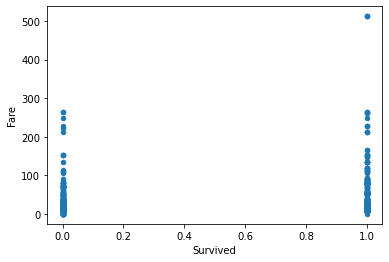

In [19]:
titanic.plot.scatter(y="Fare",x="Survived");

In [23]:
titanic.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [24]:
titanic.Parch+titanic.SibSp==0

0      False
1      False
2       True
3      False
4       True
       ...  
886     True
887     True
888    False
889     True
890     True
Length: 891, dtype: bool

In [30]:
titanic[titanic.Parch+titanic.SibSp==0].Survived.value_counts()

0    374
1    163
Name: Survived, dtype: int64

In [33]:
travelled_alone=titanic[titanic.Parch+titanic.SibSp==0].Survived

In [36]:
travelled_alone.size

537

In [37]:
percent=travelled_alone.value_counts()/travelled_alone.size*100

In [38]:
percent

0    69.646182
1    30.353818
Name: Survived, dtype: float64

<AxesSubplot:>

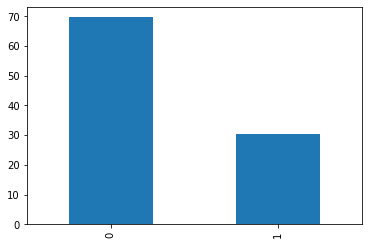

In [39]:
percent.plot(kind="bar")

<AxesSubplot:>

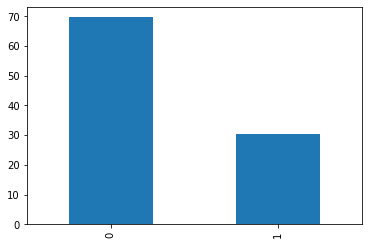

In [40]:
percent.plot.bar()

In [ ]:
titanic.loc[:]

In [45]:
(titanic.Parch+titanic.SibSp==0).sum()

537

In [47]:
result=(titanic.Parch+titanic.SibSp==0).value_counts()

In [48]:
result.index=["Alone","With Family"]

In [49]:
result

Alone          537
With Family    354
dtype: int64

<AxesSubplot:>

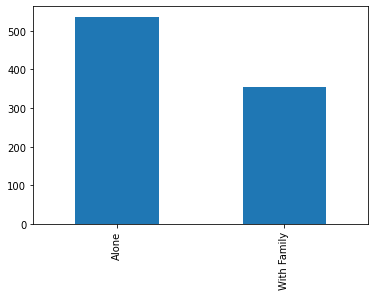

In [50]:
result.plot.bar()

In [51]:
import seaborn as sns

/Users/georgebsmith/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


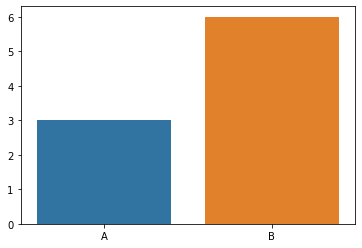

In [53]:
sns.barplot(["A","B"],[3,6]);

In [54]:
titanic["Alone"]= titanic.Parch+titanic.SibSp==0

In [55]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,True


In [57]:
titanic.groupby("Alone").count().Survived

Alone
False    354
True     537
Name: Survived, dtype: int64

/Users/georgebsmith/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived'>

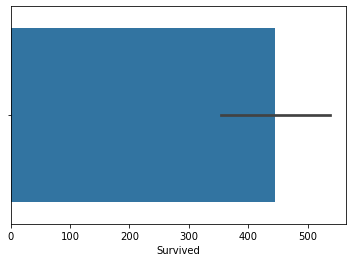

In [58]:
sns.barplot(titanic.groupby("Alone").count().Survived)

<AxesSubplot:xlabel='Alone'>

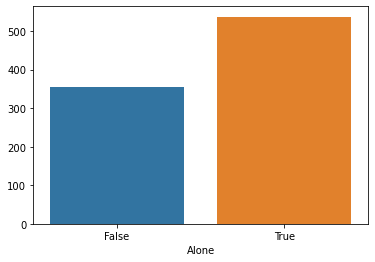

In [59]:
sns.barplot(x=titanic.groupby("Alone").count().Survived.index,
           y=titanic.groupby("Alone").count().Survived.values)

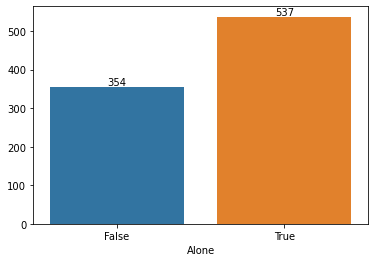

In [67]:
ax=sns.barplot(x=titanic.groupby("Alone").count().Survived.index,
           y=titanic.groupby("Alone").count().Survived.values)
ax.bar_label(ax.containers[0]);

In [64]:
dir(ax.containers)

['__add__',
 '__class__',
 '__class_getitem__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__rmul__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'append',
 'clear',
 'copy',
 'count',
 'extend',
 'index',
 'insert',
 'pop',
 'remove',
 'reverse',
 'sort']